# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 2

Do wykonania zadań proszę zapoznać się z metodami, właściwościami, oraz funkcjami:
`__repr__`, `__str__`, `__add__`, `__sub__`, `__eq__`, `__lt__`, `__gt__`, `__le__`, `__ge__`, `__ne__`, `__hash__`, `__truediv__`, `__mul__`, `__class__`, `__name__`, `id`.

Operatory: https://docs.python.org/3/library/operator.html


**UWAGA**: W niniejszym laboratorium proszę nie korzystać z zewnętrzych modułów/bibliotek (poza biblioteką _matplotlib_).

**UWAGA 2**: Obsługę błędów należy zrealizować w postaci wyjątków.

### Zadanie 1

Napisz klasę `Vector` udostępniającą funkcjonalność:
- reprezentuje wektor dowolnej długości,
- obiekt inicjowany listą (np. `Vector([1, 2, 3])`,
- posiada funkcję zwracającą moduł wektora,
- umożliwia dodawanie (`+`) i odejmowanie (`-`) wektorów. Dodaj obsługę błędów (różna długość (liczba elementów) wektora),
- możliwość wyświetlenia wektora jako listy za pomocą funkcji `print(v)` (metoda `__str__`),
- uruchomienie komórki zawierającej jedynie nazwę zmiennej (typu `Vector`) spowoduje wyświetlenie nazwy typu `Vector`, adresu zmiennej w pamięci (funkcja `id`) oraz jej zawartości, np. `<Vector([1, 2, 3]) at 140185630442880>` (metoda `__repr__`)

In [1]:
###################################################
#Class
import operator

class Vector:
    def __init__(self,in_list):
        self.content = in_list
    #Metoda str pozwalajaca na zwrocenie okreslonej wiadomosci uuzywajac zwyklego print na klasie
    def __str__(self):
        message = str(self.content)
        return message
        
    #Funkcja modulu
    def modulo(self):
        m = [el**2 for el in self.content]
        m = sum(m)**0.5
        return m
        
    #Funkcja repr (zawartosc + adres pamieci)
    def __repr__(self):
        r = f"{self.__class__.__name__}({self.content}) at {id(self)}"
        return r

    def __add__(self, other):
        """
        https://discuss.python.org/t/how-to-overload-add-method-in-a-self-made-class-to-sum-multiple-objects-of-the-class/40543/4
        """
        if not isinstance(other, self.__class__):
            raise TypeError(f"Operands must be of type {self.__class__.__name__}")
        if len(self.content) == len(other.content):
            e = []
            for i in range(len(self.content)):
                e.append(self.content[i]+ other.content[i])
        #Else return error value
        else:
            raise ValueError("Vectors have different lenght, they need to have uniform shape")

        return e

    def __sub__(self, other):
        """
        https://discuss.python.org/t/how-to-overload-add-method-in-a-self-made-class-to-sum-multiple-objects-of-the-class/40543/4
        """
        if not isinstance(other, self.__class__):
            raise TypeError(f"Operands must be of type {self.__class__.__name__}")
        if len(self.content) == len(other.content):
            e = []
            for i in range(len(self.content)):
                e.append(self.content[i] - other.content[i])
        #Else return error value
        else:
            raise ValueError("Vectors have different lenght, they need to have uniform shape")
    
        return e
            
    def compare(self, other, op):
        if not isinstance(other, self.__class__):
            raise TypeError(f"Operands must be of type {self.__class__.__name__}")
            
        if len(self.content) != len(other.content):
            raise ValueError("Vectors must have the same length")
            
        return [op(a, b) for a, b in zip(self.content, other.content)]

    #Mniejsze niz
    def __lt__(self, other): return self.compare(other, operator.lt)
    #Mniejsze/rowne niz
    def __le__(self, other): return self.compare(other, operator.le)
    #Wieksze niz
    def __gt__(self, other): return self.compare(other, operator.gt)
    #Wieksze/rowne niz
    def __ge__(self, other): return self.compare(other, operator.ge)
    #Rowne
    def __eq__(self, other): return self.compare(other, operator.eq)
    #Rozne
    def __ne__(self, other): return self.compare(other, operator.ne)

    #Hash w zaleznosci od zawartosci wektora
    def __hash__(self):
        return hash(tuple((self.content)))

    #Dzielenie
    def __truediv__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            if other == 0:
                raise ValueError("Number cannot be 0")
            e = [value / other for value in self.content]
            return e
        else:
            raise TypeError("Operands must be scalar")
            
    def __mul__(self,other):
        if isinstance(other, int) or isinstance(other, float):
            e = [value * other for value in self.content]
            return e
        else:
            raise TypeError("Operands must be scalar")

    
###################################################
#Testing functionality


init_list_1 = [1,2,3,4,5]
init_list_2 = [1,2,3,4,5]
Test_vector_1 = Vector(init_list_1)
Test_vector_2 = Vector(init_list_2)
print("Funkcja __str__ : ", Test_vector_1)
print("Funkcja modulu : ", Test_vector_1.modulo())

Test_vector_1
#################
# +-
test_sum = Test_vector_1 + Test_vector_2
print("Test sum: ", test_sum)
test_sub = Test_vector_1 - Test_vector_2
print("Test sub: ", test_sub)


Funkcja __str__ :  [1, 2, 3, 4, 5]
Funkcja modulu :  7.416198487095663
Test sum:  [2, 4, 6, 8, 10]
Test sub:  [0, 0, 0, 0, 0]


In [94]:
#Funckcja __repr__
Test_vector_1

Vector([1, 2, 3, 4, 5]) at 2227868576048

### Zadanie 2

Do wcześniej zaimplementowanej klasy dopisz funkcje pozwalające na porównanie wektorów za pomocą operatorów: `==`, `>=`, `<=`, `>`, `<`, `!=`. Porównanie ma zostać wykonane na poziomie elementów wektorów (_element wise_), poniżej przykład:

```ipython
 In [1]: a = Vector([1, 2, 3]) \
    ...: b = Vector([3, 2, 1]) \
    ...: a <= b
Out [1]: <Vector([True, True, False]) at 140185575662832>
```

In [2]:
print("Vec_1", Test_vector_1)
print("Vec_2", Test_vector_2)

print("Vec_1 > Vec_2")
print(Test_vector_1 > Test_vector_2)

print("Vec_1 == Vec_2")
print(Test_vector_1 == Test_vector_2)

print("Vec_1 < Vec_2")
print(Test_vector_1 < Test_vector_2)

Vec_1 [1, 2, 3, 4, 5]
Vec_2 [1, 2, 3, 4, 5]
Vec_1 > Vec_2
[False, False, False, False, False]
Vec_1 == Vec_2
[True, True, True, True, True]
Vec_1 < Vec_2
[False, False, False, False, False]


### Zadanie 3

Napisz funkcję umożliwiającą wyświetlenie wektora (`Vector`) zaczepionego w punkcie (0,0) na wykresie (zaimplementuj wyświetlanie za pomocą biblioteki `matplotlib`. 

> **UWAGA**: Funkcja powinna działać tylko dla wektora o dwóch wymiarach (dwuelementowa lista) - wykres 2D i wyświetlać komunikat jeżeli wymiar jest inny.

> Podpowiedź: możesz wykorzystać funkcję [matplotlib.pyplot.arrow](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.arrow.html)

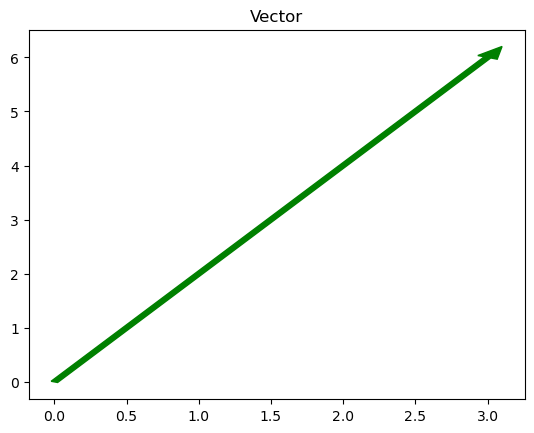

In [3]:
# <UZUPEŁNIJ>
import matplotlib.pyplot as plt
def Plot_vector(vector):
    if len(vector.content) == 2:
        x,y = vector.content
    else:
        raise TypeError("Expected Vector size of 2")
    plt.figure()
    plt.arrow(0,0,x,y,width = 0.05, color = "green")
    plt.title("Vector")

Plot_vector(Vector([3,6]))

### Zadanie 4

Dodaj możliwość zastosowania obiektu klasy `Vector` jako klucza w słowniku. Np.:

```python
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]
```

In [4]:
# <UZUPEŁNIJ>
#Warunki obiektu aby mógłb byc kluczem: Musi być hashowalny
#Jak policzyć hasha python  (funkcja hash)
#implementacja metody hash

Test_dict = {
            Vector([1,2,3]): "Wektor_1",
            Vector([3,2,1]): "Wektor_2",
            }

print(Test_dict)

{Vector([1, 2, 3]) at 1818922124496: 'Wektor_1', Vector([3, 2, 1]) at 1821047219280: 'Wektor_2'}


### Zadanie 5

Dodaj funkcjonalność:
- dzielenia przez skalar (np. `Vector([2, 4]) / 2`),
- mnożenia przez skalar (np. `Vector([2, 4]) * 2`).

> Podpowiedź: Pamiętaj o obsłudze błędów.

In [5]:
# <UZUPEŁNIJ>

print("Test_vector_1", Test_vector_1)
print("Test_vector_1 / 2", Test_vector_1 / 2)
print("\n")
print("Test_vector_2", Test_vector_1)
print("Test_vector_2 * 2", Test_vector_1*2)

Test_vector_1 [1, 2, 3, 4, 5]
Test_vector_1 / 2 [0.5, 1.0, 1.5, 2.0, 2.5]


Test_vector_2 [1, 2, 3, 4, 5]
Test_vector_2 * 2 [2, 4, 6, 8, 10]
